In [4]:
# conda install uproot awkward numpay matplotlib
import numpy as np
import matplotlib.pylab as plt

import uproot
import awkward as ak

In [5]:
#infile_name = 'root://eospublic.cern.ch//eos/opendata/cms/derived-data/AOD2NanoAODOutreachTool/ForHiggsTo4Leptons/SMHiggsToZZTo4L.root'
#infile = uproot.open(infile_name)
infile= uproot.open("test.f13.root")
keys = infile.keys()
keys

['run;1', 'events;1']

In [6]:
events = infile['events']
events.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
event                | UEvent                   | AsGroup(<TBranchElement 'ev...
event/TObject        | (group of fUniqueID:u... | AsGroup(<TBranchElement 'TO...
event/TObject/fUn... | uint32_t                 | AsDtype('>u4')
event/TObject/fBits  | uint32_t                 | AsDtype('>u4')
event/fEventNr       | int32_t                  | AsDtype('>i4')
event/fB             | double                   | AsDtype('>f8')
event/fPhi           | double                   | AsDtype('>f8')
event/fNes           | int32_t                  | AsDtype('>i4')
event/fStepNr        | int32_t                  | AsDtype('>i4')
event/fStepT         | double                   | AsDtype('>f8')
event/fNpa           | int32_t                  | AsDtype('>i4')
event/fComment       | TString                  | AsStrings()
event/fParticles     | TClone

In [7]:
tree = infile['events/fParticles']
tree.keys()

['fParticles.fUniqueID',
 'fParticles.fBits',
 'fParticles.fIndex',
 'fParticles.fPdg',
 'fParticles.fStatus',
 'fParticles.fParent',
 'fParticles.fParentDecay',
 'fParticles.fMate',
 'fParticles.fDecay',
 'fParticles.fChild[2]',
 'fParticles.fPx',
 'fParticles.fPy',
 'fParticles.fPz',
 'fParticles.fE',
 'fParticles.fX',
 'fParticles.fY',
 'fParticles.fZ',
 'fParticles.fT',
 'fParticles.fWeight']

In [8]:
branches = tree.arrays()
len(branches)

1

In [9]:
px = tree['fParticles.fPx']
print(px.array())


[[1.08, 1.39, -0.207, 1.87, 0.148, ..., -0.505, -0.358, -0.121, -0.273, 0.225]]


Text(0.5, 0, 'Muon $p_x$ (GeV/c)')

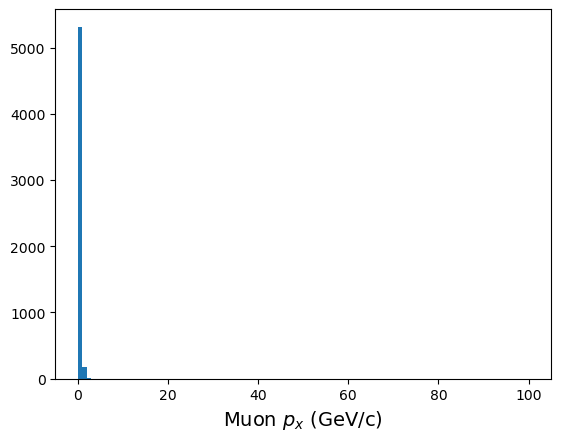

In [10]:

plt.figure()
plt.hist(ak.flatten(px.array()),bins=100,range=(0,100));
plt.xlabel(r'Muon $p_x$ (GeV/c)',fontsize=14)

In [11]:
p = np.sqrt((branches['fParticles.fPx']*branches['fParticles.fPx']) + (branches['fParticles.fPy']*branches['fParticles.fPy']) + (branches['fParticles.fPz']*branches['fParticles.fPz']))
pt = np.sqrt((branches['fParticles.fPx']*branches['fParticles.fPx']) + (branches['fParticles.fPy']*branches['fParticles.fPy']))
eta = 0.5*np.log((p+branches['fParticles.fPx'])/(p-branches['fParticles.fPx']))
proton = branches['fParticles.fPdg'] == 2212
pion = branches['fParticles.fPdg'] == 211
kaon = branches['fParticles.fPdg'] == 321

ak.flatten(pt[proton])

<Array [1.12, 1.88, 0.158, 1.81, ..., 0.861, 0.545, 1.3] type='216 * float64'>

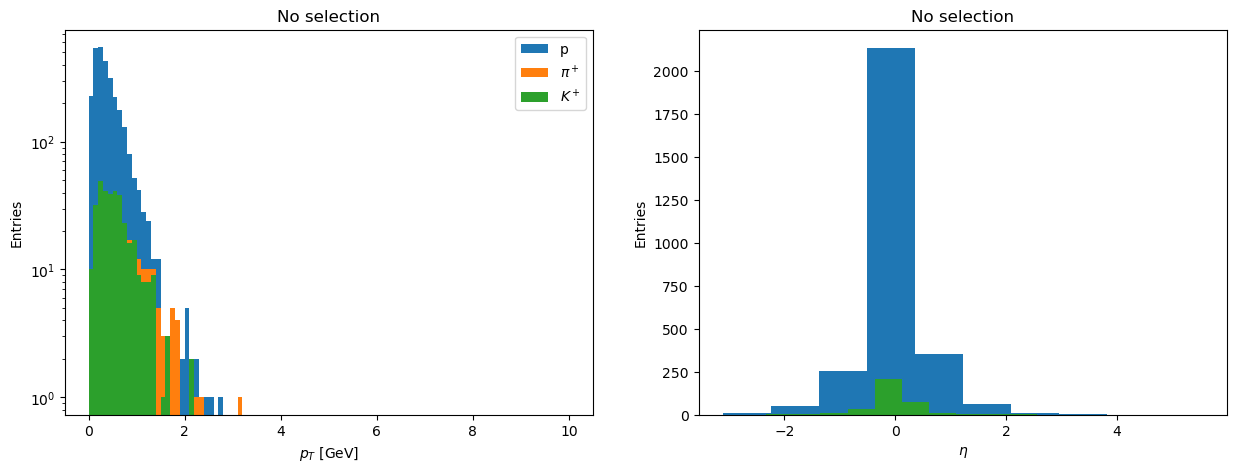

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(ak.flatten(pt[pion]), bins=100, range=(0, 10),label='p')
plt.hist(ak.flatten(pt[proton]), bins=100, range=(0, 10),label='$\pi^+$')
plt.hist(ak.flatten(pt[kaon]), bins=100, range=(0, 10),label='$K^+$')
plt.title('No selection')
plt.xlabel('$p_T$ [GeV]')
plt.ylabel('Entries')
plt.yscale('log')
plt.legend()
plt.subplot(1,2,2)
plt.hist(ak.flatten(eta[pion]))
plt.hist(ak.flatten(eta[proton]))
plt.hist(ak.flatten(eta[kaon]))
plt.title('No selection')
plt.xlabel('$\eta$')
plt.ylabel('Entries')
plt.show()


In [13]:
print('Mean Transverse momentum pions:',np.mean(ak.flatten(pt[pion])))
print('Mean Transverse momentum protons:',np.mean(ak.flatten(pt[proton])))
print('Mean Transverse momentum kaons:',np.mean(ak.flatten(pt[kaon])))


Mean Transverse momentum pions: 0.4044525769955002
Mean Transverse momentum protons: 0.8199095446354551
Mean Transverse momentum kaons: 0.5648998518002651
